__Bei dieser Untersuchung geht es darum festzustellen, ob die Gammastrahlung, die durch den Satelliten "Compton Gamma-Ray Observatory (CGRO)" aufgenommen wurde, eine konstante Emissonsrate hat.__

In [14]:
import numpy as np 
import pandas as pd 
import scipy 
import matplotlib.pyplot as plt

In [15]:
# Daten einlesen
Daten = pd.read_csv("Daten Gammastrahlung.csv")

In [16]:
Daten.head()

,seconds,count
0,116.0,0.0
1,112.0,0.0
2,160.0,0.0
3,51.5,0.0
4,102.0,1.0


In [17]:
Daten.rename(columns={"seconds": "Sekunden [t_i]", "count": "Anzahl [S_i]"}, inplace=True)

In [18]:
Daten.head(2)

,Sekunden [t_i],Anzahl [S_i]
0,116.0,0.0
1,112.0,0.0


In [19]:
Daten.shape

(100, 2)

Da die Anzahl der auftrettenden Gammastrahlungen nur ganzzahlige Werte annehmen kann, eignen sich diskrete Verteilungen zum Beschreiben der Daten. Im konkreten Fall scheint die [Poisson-Verteilung](https://de.wikipedia.org/wiki/Poisson-Verteilung) aufgrund der Problemstellung geeigent.

__Poisson-Verteilung:__  <br>
<br>
 $P_{\lambda}(k) = \frac{\lambda^k}{k!} \cdot e^{-\lambda}$  <br>
 <br>
 mit k=$N_0$ und ${\lambda}$>0

__Als Beschreibung:__<br>
$S_i$~Poisson(${\lambda}_i \cdot {t}_i$) = Anzahl der Gammastrahlen im i-ten Zeitintervall<br>
${\lambda}_i$ = Durchschnittliche Anzahl der Gammastrahlen im i-ten Zeitintervall <br>
$t_i$ = Dauer in Sekunden des i-ten Zeitintervalls<br>
i = i-te Zeitintervall

Im Grunde geht es bei der Untersuchung darum festzustellen, ob $H_0:{\lambda}_0={\lambda}_1=...={\lambda}_{99}$ bzw. 
$H_A:{\lambda}_i ≠ {\lambda}_j $ für ein beliebiges i und j gilt.

Lambda wird über die __Maximum-Likelihood-Methode__ bestimmt: <br>

$f(S_0,S_1,...,S_{99}|{\lambda})=\prod_{i=0}^{99} \frac{(\lambda\cdot t_i)^{S_i}}{S_i!} \cdot e^{-\lambda \cdot t_i}$ <br>

$\ln(f)=\ln(\prod_{i=0}^{99} \frac{(\lambda\cdot t_i)^{S_i}}{S_i!} \cdot e^{-\lambda \cdot t_i})$ 
$=-{\lambda}\sum_{i=0}^{99} t_i + \ln(\lambda)\sum_{i=0}^{99} S_i + \sum_{i=0}^{99}\ln(S_i) - \sum_{i=0}^{99}ln(S_i!)$ <br>

$\underset{\lambda}{\operatorname{argmax}} \ln(f): 0=ln(f) \frac{d}{d\lambda}= -\sum_{i=0}^{99} t_i+\sum_{i=0}^{99} \frac{S_i}{\lambda}$ <br>

$⇒\hat{\lambda}= \frac{\sum_{i=0}^{99}S_i}{\sum_{i=0}^{99}t_i}$ bzw. $\hat{\lambda}_i= \frac{S_i}{t_i}$

In [20]:
# Berechnung nach der Maximum-Likelihood-Methode
H0_lambda_hat = Daten['Anzahl [S_i]'].sum()/Daten['Sekunden [t_i]'].sum()
HA_lambda_hats = Daten['Anzahl [S_i]']/Daten['Sekunden [t_i]']
print("H0 = {}".format(H0_lambda_hat))
print("HA = {}".format(HA_lambda_hats))

H0 = 0.0038808514969907496
HA = 0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.009804
        ...   
95    0.025840
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Length: 100, dtype: float64


Zum Testen der Teststatistik verwende ich den __Likelikhood-Ratio-Test__:<br>
${\Lambda}(x)=-2\ln(\frac{maxf(S_0,S_1,..,S99|\lambda)}{maxf(S_0,S_1,..,S99|\lambda_0,...,\lambda_{99})})$<br><br>
Dieser folgt einer Chi-Quadrat-Verteilung mit ${\chi}^2_{99}$. Für den Fehler erster Art wird ${\alpha}=5\%$ angesetzt.

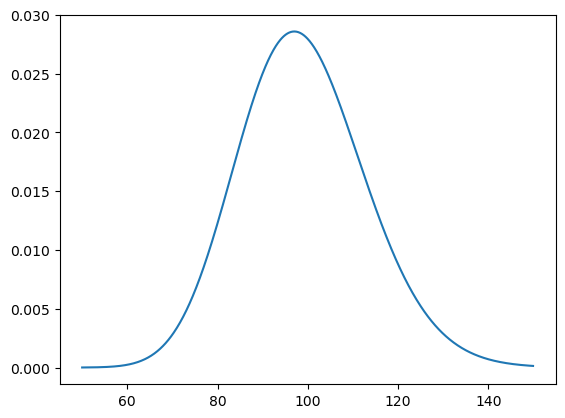

In [21]:
# Chi-Quadrat-Verteilung für 99 Freiheitsgrade
X = np.arange(50,150,0.1)
plt.plot(X, scipy.stats.chi2.pdf(X, 99))
plt.show()

In [22]:
# Der Zahlenwert der Teststatistik für die Chi-Quadrat-Verteilung mit 99 Freiheitsgraden und Alpha 5%.
Teststatistik=scipy.stats.chi2.isf(0.05, 99)
Teststatistik

123.22522145336181

In [23]:
def H0_likelihood(lamb):
    # Die Likelihood-Funktion ist das Produkt der Poisson-Verteilungen. Für H0 hat jede Poisson-Verteilung denselben Mittelwert
    return scipy.stats.poisson.pmf(Daten['Anzahl [S_i]'], Daten['Sekunden [t_i]']*lamb).prod(axis=0)

def HA_likelihood(lambs):
    # Für HA sind die Mittelwerte der Poisson-Verteilung durch die Lambdas gegeben.
    return scipy.stats.poisson.pmf(Daten['Anzahl [S_i]'], Daten['Sekunden [t_i]']*lambs).prod(axis=0)

In [27]:
# Der Wert der Teststatistik der observierten Daten
Teststatistik_observiert = -2*np.log(H0_likelihood(H0_lambda_hat)/HA_likelihood(HA_lambda_hats))
Teststatistik_observiert

104.39792133021314

In [25]:
# Der p-Wert der observierten Daten
p_Wert = scipy.stats.chi2.sf(Test_Statistik_obsertviert, 99)
p_Wert

0.33576662402509894

In [28]:
print(f"Teststatistik: {Teststatistik:.2f}, Teststatistik_observiert: {Teststatistik_observiert:.2f}")
print(f"Aplha: 0.05, p_Wert:{p_Wert:.2f}")

Teststatistik: 123.23, Teststatistik_observiert: 104.40
Aplha: 0.05, p_Wert:0.34


__Fazit__: H0 kann nicht verworfen werden. Die detektierte Emmissionsrate scheint konstant zu sein.

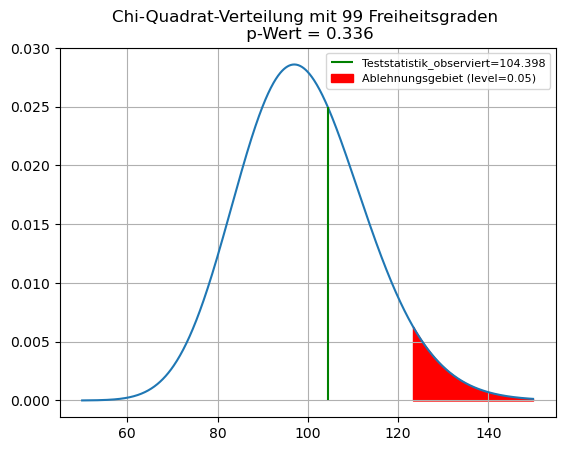

In [46]:
# Visualisierung der Chi-Quadrat-Verteilung und der p-Werte
Freiheitsgrade = 99
significance_level = 0.05
plt.plot(X, scipy.stats.chi2.pdf(X, Freiheitsgrade))
plt.vlines(Teststatistik_observiert, 0, scipy.stats.chi2.pdf(Teststatistik_observiert, Freiheitsgrade), colors='g', label='Teststatistik_observiert={:.3f}'.format(Teststatistik_observiert))
plt.fill_between(X, scipy.stats.chi2.pdf(X, Freiheitsgrade), where=X>=Teststatistik, color='red', label='Ablehnungsgebiet (level={})'.format(significance_level))
plt.title(f'Chi-Quadrat-Verteilung mit {Freiheitsgrade} Freiheitsgraden \n p-Wert = {p_Wert:.3f}')

plt.legend(loc='upper right',  prop={'size': 8})
plt.grid()
plt.show()